<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Univariate-Normal-Distribution" data-toc-modified-id="-Univariate-Normal-Distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font face="gotham" color="purple"> Univariate Normal Distribution</font></a></span></li><li><span><a href="#-Multivariate-Normal-Distribution-(MND)" data-toc-modified-id="-Multivariate-Normal-Distribution-(MND)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><font face="gotham" color="purple"> Multivariate Normal Distribution (MND)</font></a></span><ul class="toc-item"><li><span><a href="#-Expectation-and-Covariance-Matrix" data-toc-modified-id="-Expectation-and-Covariance-Matrix-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><font face="gotham" color="purple"> Expectation and Covariance Matrix</font></a></span></li><li><span><a href="#-Linear-Combination-of-Normal-Distribution" data-toc-modified-id="-Linear-Combination-of-Normal-Distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><font face="gotham" color="purple"> Linear Combination of Normal Distribution</font></a></span></li><li><span><a href="#-Inverse-and-Positive-Definite" data-toc-modified-id="-Inverse-and-Positive-Definite-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><font face="gotham" color="purple"> Inverse and Positive Definite</font></a></span></li><li><span><a href="#-Inverse-and-Symmetry" data-toc-modified-id="-Inverse-and-Symmetry-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><font face="gotham" color="purple"> Inverse and Symmetry</font></a></span></li><li><span><a href="#-Bivariate-Normal-Distribution" data-toc-modified-id="-Bivariate-Normal-Distribution-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><font face="gotham" color="purple"> Bivariate Normal Distribution</font></a></span></li><li><span><a href="#-Covariance-Matrix" data-toc-modified-id="-Covariance-Matrix-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span><font face="gotham" color="purple"> Covariance Matrix</font></a></span></li><li><span><a href="#-Isocontours" data-toc-modified-id="-Isocontours-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span><font face="gotham" color="purple"> Isocontours</font></a></span></li><li><span><a href="#-Covariance-Matrix-with-Nonezero-Covariance" data-toc-modified-id="-Covariance-Matrix-with-Nonezero-Covariance-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span><font face="gotham" color="purple"> Covariance Matrix with Nonezero Covariance</font></a></span></li></ul></li><li><span><a href="#-Quadratic-Form-of-Normal-Distribution" data-toc-modified-id="-Quadratic-Form-of-Normal-Distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><font face="gotham" color="purple"> Quadratic Form of Normal Distribution</font></a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy
sy.init_printing() 
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [4]:
import warnings
warnings.filterwarnings("ignore")

Perhaps this one of the most important application of linear algebra. We will build up intuition gradually before turning to multivariate normal distribution.

# <font face="gotham" color="purple"> Univariate Normal Distribution

The PDF of univariate normal distribution is given by

$$
p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi}\sigma}\exp{\left(-\frac{1}{2\sigma^2}(x-\mu)^2\right)}
$$

where $p(x; \mu, \sigma^2)$ mean random variable is $x$, parameters are $\mu$ and $\sigma^2$, it is not a conditional sign which commonly looks like $p(x|y)$.

Note that $-\frac{1}{2\sigma^2}(x-\mu)^2$ is a quadratic function, which is the univariate version of quadratic form we have seen in earlier chapters.

If we define $\sigma = 2$, $\mu = 1$, let's plot the quadratic function and its exponential.

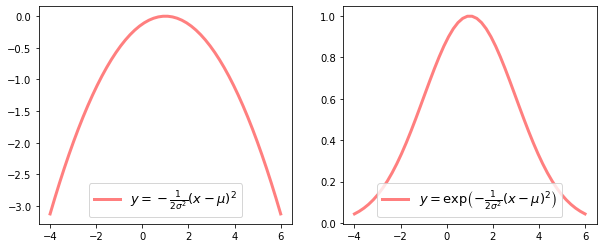

In [5]:
sigma = 2
mu = 1
x = np.linspace(-4, 6)
y = -1/(2*sigma**2)*(x-mu)**2

fig, axs = plt.subplots(1, 2, figsize = (10, 4))
axs[0].plot(x, y, lw = 3, color = 'r', alpha = .5,
            label = r'$y=-\frac{1}{2\sigma^2}(x-\mu)^2$')
axs[0].legend(loc ='best', fontsize = 13)

axs[1].plot(x,np.exp(y), lw = 3, color = 'r', alpha = .5, 
            label = r'$y=\exp{\left(-\frac{1}{2\sigma^2}(x-\mu)^2\right)}$')
axs[1].legend(loc ='best', fontsize = 13)
plt.show()

The constant in front, $\frac{1}{\sqrt{2\pi}\sigma}$, is a normalizing factor which ensures the integral of the whole function equals to $1$. 

$$
 \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi} \sigma}\exp \left(-\frac{1}{2 \sigma^{2}}(x-\mu)^{2}\right)dx=1
$$

Easiest way to plot a univariate normal PDF is to use Scipy's normal distribution function, ```sp.stats.norm.pdf()```, we can specify the $\mu$ and $\sigma$.

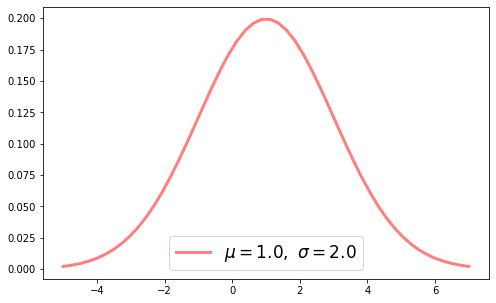

In [6]:
x = np.linspace(-5, 7)
mu = 1
sigma = 2

y = sp.stats.norm.pdf(x, loc = mu, scale = sigma)

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(x, y, lw = 3, color = 'r', alpha = .5, 
        label = r'$\mu = %.1f,\  \sigma = %.1f$'%(mu, sigma))
ax.legend(loc ='best', fontsize= 17)
plt.show()

That's all we need to know about univariate distribution! 

For more details, check out my notebook of <font face="gotham" color="red">basic statistics</font>.

# <font face="gotham" color="purple"> Multivariate Normal Distribution (MND)

The PDF of a multivariate normal distribution is 

$$
p(\mathbf{x} ; \mu, \Sigma)=\frac{1}{(2 \pi)^{n / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}(x-\mu)^{T} \Sigma^{-1}(x-\mu)\right) \tag{1}\label{1}
$$

Before we analyze the PDF, we should know some basics of random vectors.

## <font face="gotham" color="purple"> Expectation and Covariance Matrix

Consider a random $n$-vector $\mathbf{x}$, its expection is defined as

$$
E(\mathbf{x}) = 
\left[
\begin{matrix}
E(x_1)\\E(x_2)\\ \vdots \\E(x_n)
\end{matrix}
\right]
$$

The variance of $\mathbf{x}$ is a covariance matrix, denoted as

$$
\begin{aligned}
\Sigma_{\mathbf{x} \mathbf{x}}=\operatorname{Var}(\mathbf{x}) &=E\left[(\mathbf{x}-\mu)(\mathbf{x}-\mu)^T\right]\\
&=\left[\begin{array}{cccc}
\operatorname{Var}\left(x_{1}\right) & \operatorname{Cov}\left(x_{1}, x_{2}\right) & \dots & \operatorname{Cov}\left(x_{1}, x_{n}\right) \\
\operatorname{Cov}\left(x_{2}, x_{1}\right) & \operatorname{Var}\left(x_{2}\right) & \dots & \operatorname{Cov}\left(x_{2}, x_{n}\right) \\
\vdots & \vdots & \ddots & \vdots \\
\operatorname{Cov}\left(x_{n}, x_{1}\right) & \operatorname{Cov}\left(x_{n}, x_{2}\right) & \dots & \operatorname{Var}\left(x_{n}\right)
\end{array}\right]
\end{aligned}
$$

## <font face="gotham" color="purple"> Linear Combination of Normal Distribution

As you have guessed, the linear combination of a sequence of normal distribution will be a normal distribution as well. Let's say we have another random vector $\pmb{z}$

$$
\mathbf{z}=
\left[
\begin{matrix}
z_1\\z_2\\ \vdots \\z_n
\end{matrix}
\right]
$$

where $z_i\sim iid(0,\  \sigma^2)$

For any matrix $A_{n\times n}$ of full rank, random normal vector $\mathbf{x}$ can be write as

$$
\mathbf{x} = A\mathbf{z}
$$

It simply states that each $x_i, i=(1,2,...,n) $ is a linear combination of $\mathbf{z}$.

If $\mathbf{\mu} = \mathbf{0}$, the variance of $\mathbf{x}$ is 

$$
\operatorname{Var}(\mathbf{x})=E\left(\mathbf{x} \mathbf{x}^{T}\right)={A }E\left(\mathbf{z} \mathbf{z}^{T}\right) {A}^{T}={A} \mathbf{I} {A}^{T}={A} {A}^{T}
$$

Covariance matrix ${AA}^T$ is positive semi-definite matrix, let $\mathbf{x}$ be an $n$-vector, then

$$
\mathbf{x}^T{AA}^T\mathbf{x}= ({A}^T\mathbf{x})^T({A}^T\mathbf{x}) = \|{A}^T\mathbf{x}\|^2 \geq 0
$$

It also means that all eigenvalues of ${AA}^T$ are non-negative as well, refer to Chapter 17, the section of positive definite matrix.

## <font face="gotham" color="purple"> Inverse and Positive Definite

If $ {A}_{n\times n}$ is positive definite and symmetric, then all the eigenvalues are larger than $0$. But what if there is $0$ eigenvalue, then we get

$$
 {A\mathbf{x}} =  {0}
$$

since $ {\mathbf{x}}$ is a nontrivial solution(eigenvector is always nonzero), therefore $ {A}$ must be non-invertible.

Thus, if $ {A}$ is positive definite, $ {A}$ does not have $ {0}$ eigenvector which means it is invertible.

## <font face="gotham" color="purple"> Inverse and Symmetry

The same $ {A}$ as in last section, we have $ {A} {A}^{-1}=\mathbf{I}$. Taking the transpose, we get

$$
( {A}^{-1})^T {A} = ( {A}^{T})^{-1} {A}=   {A}^{-1} {A}=\mathbf{I}
$$

We can see that $( {A}^{-1})^T= {A}^{-1}$, $ {A}^{-1}$ is also a symmetric matrix.

Now we can show that $ A^{-1}$ is also positive definite.

$$
A \mathbf{v}=\lambda \mathbf{v} \Longrightarrow A^{-1} A \mathbf{v}=\lambda A^{-1} \mathbf{v} \Longrightarrow\frac{1}{\lambda} \mathbf{v} = A^{-1}\mathbf{v}
$$

We have proved that if $ {A}$ has eigenvalue $\lambda$, then $ {A}^{-1}$ has $\frac{1}{\lambda}$ as its eigenvalue.

If $\lambda>0$, certainly $\frac{1}{\lambda}>0$, thus $ {A}^{-1}$ is also positive definite.

## <font face="gotham" color="purple"> Bivariate Normal Distribution

In the PDF of MND, the argument of exponential function is $-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T} \Sigma^{-1}(\mathbf{x}-\mathbf\mu)$, which is a quadratic form. 

$\Sigma$ is symmetric positive semi-definite, so is $\Sigma^{-1}$ for any vector $\mathbf{x} = \mathbf{\mu}$. 

With a minus sign in front, we get negative semi-definite quadratic form

$$
-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\Sigma^{-1}( \mathbf{x}-{\mu})\leq 0
$$

If we define a simple bivariate case, the quadratic form is 

\begin{align}
-\frac{1}{2}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]^{T}\left[\begin{array}{cc}
\sigma_{1}^{2} & 0 \\
0 & \sigma_{2}^{2}
\end{array}\right]^{-1}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]&=
-\frac{1}{2}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]^{T}\left[\begin{array}{cc}
\frac{1}{\sigma_{1}^{2}} & 0 \\
0 & \frac{1}{\sigma_{2}^{2}}
\end{array}\right]\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]\\
&=-\frac{1}{2}\left[\begin{array}{l}
x_{1}-\mu_{1} \\
x_{2}-\mu_{2}
\end{array}\right]^{T}\left[\begin{array}{l}
\frac{1}{\sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right) \\
\frac{1}{\sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)
\end{array}\right]\\
& = -\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}
\end{align}

Further, we give value to $\sigma$ and $\mu$

$$
\sigma_1 = 2,\  \sigma_2 = 3,\  \mu_1 = 0,\  \mu_2 = 0
$$

We can visualize quadratic form and its exponential

<IPython.core.display.Javascript object>


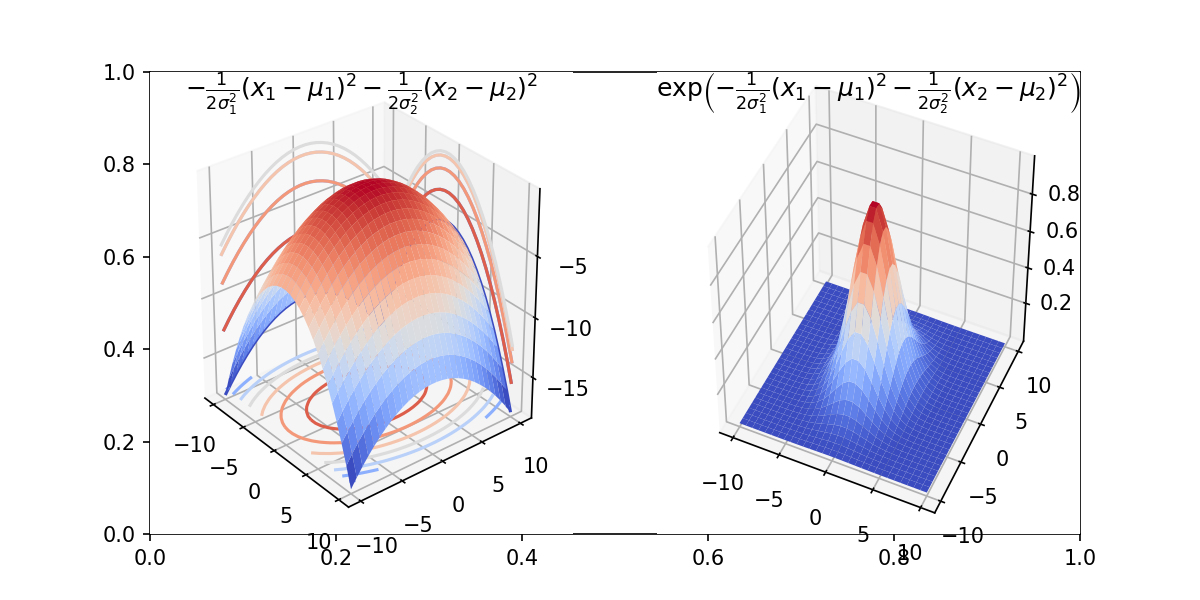

In [8]:
%matplotlib notebook
x1, x2 = np.linspace(-10, 10, 30), np.linspace(-10, 10, 30)
X1, X2 = np.meshgrid(x1, x2)

sigma1 = 2
sigma2 = 3
mu1, mu2 = 0, 0 

Z = -1/(2*sigma1**2)*(X1 - mu1)**2 - 1/(2*sigma2**2)*(X2 - mu2)**2

fig, axs = plt.subplots(figsize = (8, 4))
axs = fig.add_subplot(121, projection='3d')
axs.plot_surface(X1,X2,Z,cmap='coolwarm')
axs.set_title(r'$-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}$')
cset = axs.contour(X1, X2, Z, zdir='z', offset=-17.5, cmap='coolwarm') 
cset = axs.contour(X1, X2, Z, zdir='x', offset=-10, cmap='coolwarm') 
cset = axs.contour(X1, X2, Z, zdir='y', offset=10, cmap='coolwarm') 

expZ = np.exp(Z)
axs = fig.add_subplot(122, projection='3d')
axs.plot_surface(X1,X2,expZ,cmap='coolwarm')
axs.set_title(r'$\exp{\left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)}$')

plt.show()

Also, the most convenient way of producing bivariate normal distribution is to use Scipy multivariate normal distribution function.

<IPython.core.display.Javascript object>


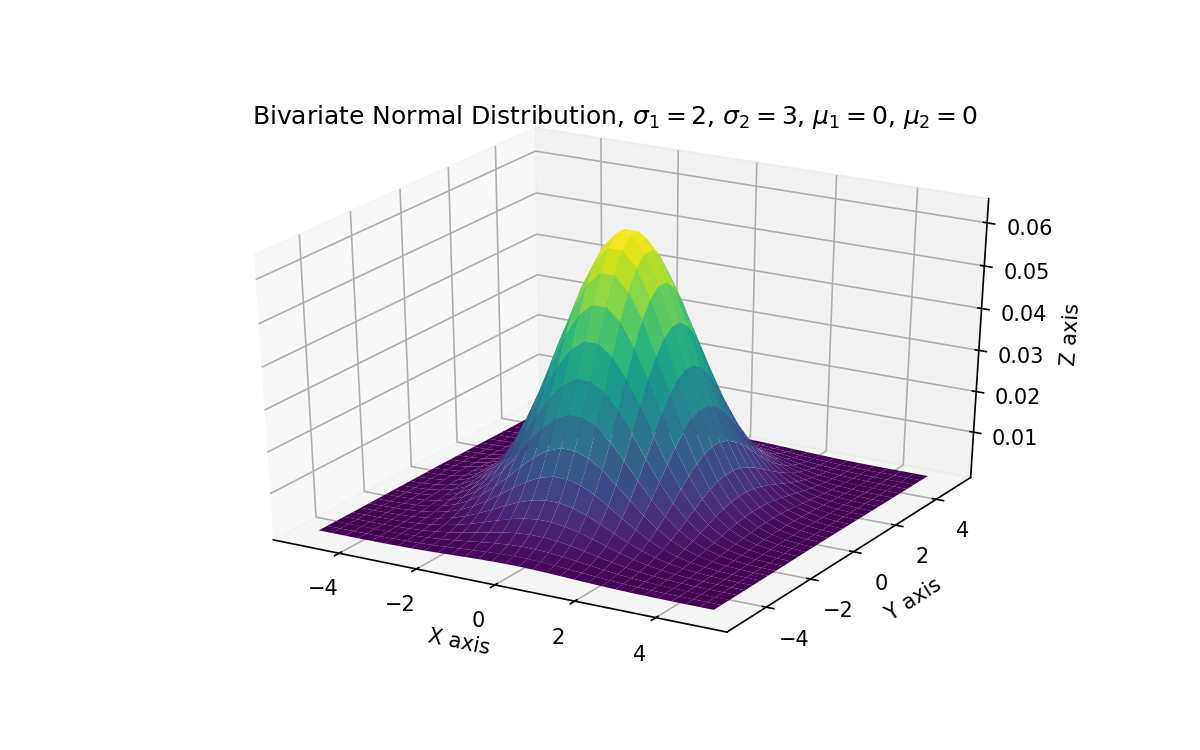

In [10]:
%matplotlib notebook
mu_1 = 0
sigma_1 = 2

mu_2 = 0
sigma_2 = 3

#Create grid and multivariate normal
x = np.linspace(-5,5,30)
y = np.linspace(-5,5,30)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y 
norm = sp.stats.multivariate_normal([mu_1, mu_2], [[sigma_1, 0], [0, sigma_2]]) # frozen 

#Make a 3D plot
fig = plt.figure(figsize = (8, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, norm.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_title('Bivariate Normal Distribution, $\sigma_1 = 2$, $\sigma_2 = 3$, $\mu_1 = 0$, $\mu_2 = 0$')

plt.show()

Since we have expanded the bivariate quadratic form, back to the MVN PDF $\eqref{1}$, we have


\begin{aligned}
 p(\mathbf{x};\mathbf{\mu}, \Sigma)
&=\frac{1}{2 \pi \sigma_{1} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)\\
&=\frac{1}{\sqrt{2 \pi} \sigma_{1}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}\right) \cdot \frac{1}{\sqrt{2 \pi} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)
\end{aligned}


We find that bivariate normal distribution can be decomposed into <font face="gotham" color="red"> a product of two single variate normal distribution</font>!

## <font face="gotham" color="purple"> Covariance Matrix

Covariance matrix is the most important factor that shapes the distribution. Use Scipy multivariate normal random generator, we can learn some intuition of the covariance matrix.

<IPython.core.display.Javascript object>


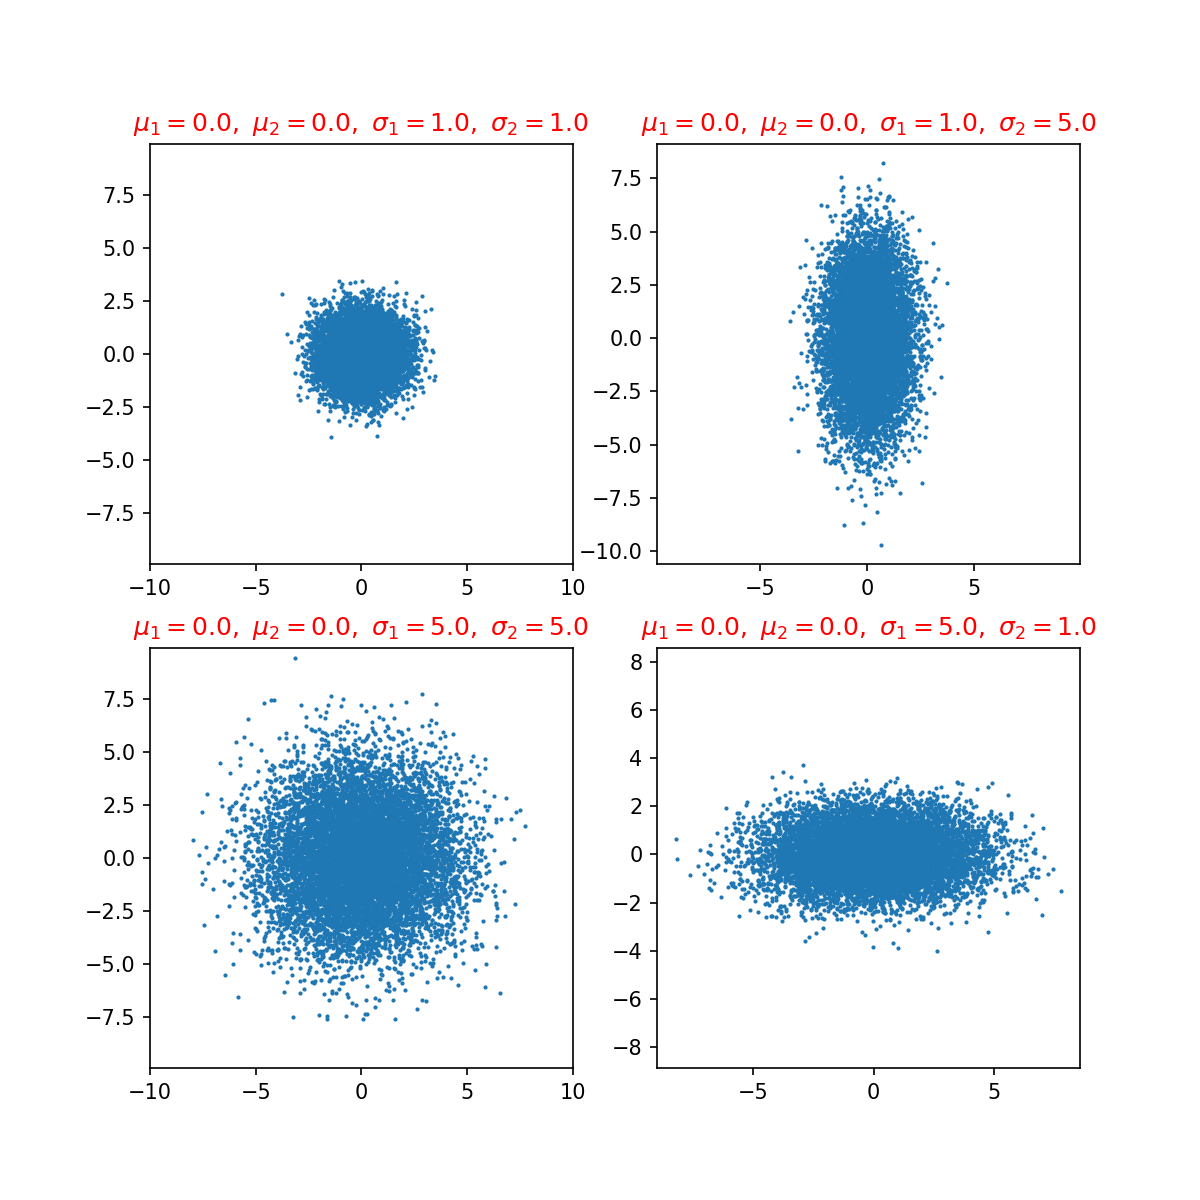

In [12]:
fig = plt.figure(figsize = (8, 8))
fig.suptitle('Bivariate Normal Randome Draw, $\rho_{12}=\rho_{21}=0$')
########
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(221)
ax.scatter(X[:,0], X[:,1], s = 1)
ax.axis('equal')
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_title(string, color = 'red')
#########

mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 5
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(222)
ax.scatter(X[:,0], X[:,1], s = 1)
ax.axis('equal')
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_title(string, color = 'red')
#########

mu1, mu2 = 0, 0
sigma1, sigma2 = 5, 5
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(223)
ax.scatter(X[:,0], X[:,1], s = 1)
ax.axis('equal')
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_title(string, color = 'red')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
#########

mu1, mu2 = 0, 0
sigma1, sigma2 = 5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)

ax = fig.add_subplot(224)
ax.scatter(X[:,0], X[:,1], s = 1)
string = r'$\mu_1 = %.1f,\  \mu_2 = %.1f,\  \sigma_1 = %.1f,\  \sigma_2 = %.1f$'%(mu1, mu2, sigma1, sigma2)
ax.set_title(string, color = 'red')
ax.axis('equal')


plt.show()

Notice that the plot above all take a diagonal covariance matrix, i.e. $\rho_{12} = \rho_{21} =0$

$$
\left[
\begin{matrix}
\sigma_1^2 & 0\\
0 & \sigma_2^2
\end{matrix}
\right]
$$

To understand the covariance matrix beyond the intuition, we need to analyze eigenvectors and -values. But we know that diagonal matrix has all of its eigenvalues on the principal diagonal, which are $\sigma_1^2$ and $\sigma_2^2$.

## <font face="gotham" color="purple"> Isocontours

Isocontours are simply contour lines. They are projections of the variable $z$ of iso height onto $xy$-plane. Let's show what they look like analytically. 

We know eigenvalues, intuitively we also feel that eigenvalues are connected with the shape of isocontours which is demonstrated by the scatter plot above.

We will derive an equation for isocontour.

We saw in previous section, that

$$
p(x ; \mu, \Sigma)=\frac{1}{2 \pi \sigma_{1} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right)
$$

In order to get the equation of a contour, we set $p(x ; \mu, \Sigma) = c$

$$
\begin{aligned}
c &=\frac{1}{2 \pi \sigma_{1} \sigma_{2}} \exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right) \\
2 \pi c \sigma_{1} \sigma_{2} &=\exp \left(-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2}\right) \\
\log \left(2 \pi c \sigma_{1} \sigma_{2}\right) &=-\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}-\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2} \\
\log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right) &=\frac{1}{2 \sigma_{1}^{2}}\left(x_{1}-\mu_{1}\right)^{2}+\frac{1}{2 \sigma_{2}^{2}}\left(x_{2}-\mu_{2}\right)^{2} \\
1 &=\frac{\left(x_{1}-\mu_{1}\right)^{2}}{2 \sigma_{1}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)}+\frac{\left(x_{2}-\mu_{2}\right)^{2}}{2 \sigma_{2}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)}
\end{aligned}
$$

Defining

$$
a=\sqrt{2 \sigma_{1}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)} \\
b=\sqrt{2 \sigma_{2}^{2} \log \left(\frac{1}{2 \pi c \sigma_{1} \sigma_{2}}\right)}
$$

it follows that

$$
\left(\frac{x_{1}-\mu_{1}}{a}\right)^{2}+\left(\frac{x_{2}-\mu_{2}}{b}\right)^{2}=1
$$

This is the equation of ellipse, $a$ are $b$ are major/minor semi radii.

The equation can be written as

$$
x_2 = b\sqrt{1-\left(\frac{x_1-\mu}{a}\right)^2}+\mu
$$

However this becomes a function, only valid for ploting half of the ellipse. There are problems while dealing with square root.

Also note that 

$$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$$

which means the singular values of the covariance matrix determines the shape of distribution. This expression also explaines why we are using $\sigma$ to represent singular values, because it is essentially standard deviation.

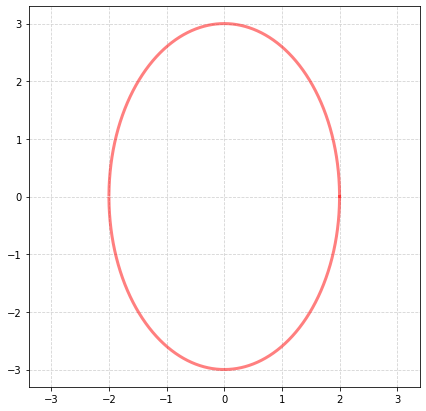

In [5]:
mu1 = 0    
mu2 = 0   

a= 2    #radius on the x1-axis
b= 3     #radius on the x2-axis

x1 = np.arange(-5, 5, .0001)
fig, ax = plt.subplots(figsize = (7, 7))
x2 = b*np.sqrt(1 - ((x1-mu1)/a)**2) + mu2
minus_x2 = - b*np.sqrt(1 - ((x1-mu1)/a)**2) + mu2
ax.plot(x1 , x2, color = 'r', lw = 3, alpha = .5)
ax.plot(x1 , -x2, color = 'r', lw = 3, alpha = .5)
ax.grid(color='lightgray',linestyle='--')
ax.axis('equal')
plt.show()

Obviously, not the best tool for plotting ellipse, we have another tool - <font face="gotham" color="red">parametric function</font> - specially designed for graphs which can't be conveniently plotted by function.

$$
x = a \cos{(t)}\\
y = b \sin{(t)}
$$

where $t \in (0,\  2\pi]$.

Then let's plot both the ellipse and random draws of corresponding bivariate normal distribution.

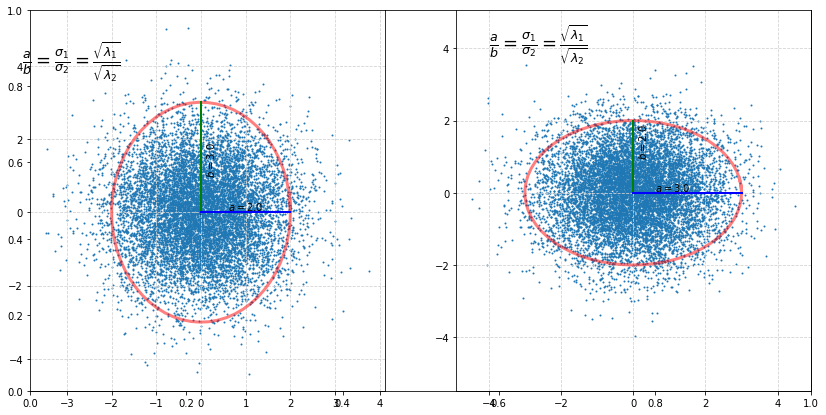

In [8]:
t = np.arange(0, 2.1*np.pi, .1) # set 2.1*pi to close the ellipse
a = 2 
b = 3

x = a * np.cos(t)
y = b * np.sin(t)
######################
fig, axs = plt.subplots(figsize = (14, 7))
axs = fig.add_subplot(121)
axs.plot(x, y, color = 'r', lw = 3, alpha = .5)
axs.scatter(0, 0, s = 20, color = 'k')
axs.plot([0, 0], [0, 3], lw = 2, color = 'g')
axs.plot([0, 2], [0, 0], lw = 2, color = 'b')

string = r'$a = %.1f$'%a
axs.text(x = .6, y = 0.05, s = string)
string = r'$b = %.1f$'%b
axs.text(x = 0.1, y = 1, s = string, rotation = 90)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1.5
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
# ax.axis('equal')

#####################
#####################
axs = fig.add_subplot(122)
a = 3 
b = 2

x = a * np.cos(t)
y = b * np.sin(t)
axs.plot(x, y, color = 'r', lw = 3, alpha = .5)
axs.scatter(0, 0, s = 20, color = 'k')
axs.plot([0, 0], [0, 2], lw = 2, color = 'g')
axs.plot([0, 3], [0, 0], lw = 2, color = 'b')

string = r'$a = %.1f$'%a
axs.text(x = .6, y = 0.05, s = string)
string = r'$b = %.1f$'%b
axs.text(x = 0.1, y = 1, s = string, rotation = 90)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1.5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, 0], [0, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')
plt.show()

Here is a side note, that some people might prefer using heatmap for distribution.

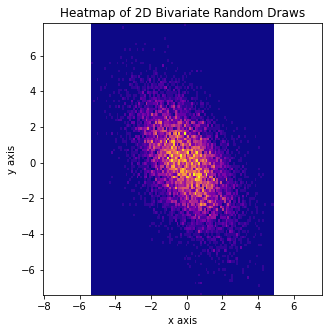

In [21]:
fig, axs = plt.subplots(figsize = (5, 5))
N_numbers = 1000
N_bins = 100
k = 10000

mu1, mu2 = 0, 0
sigma1, sigma2 = 2, 4
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, -1.5], [-1.5, sigma2]])

mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)           
axs.hist2d(X[:,0], X[:,1], bins=N_bins, density=False, cmap='plasma')

axs.set_title('Heatmap of 2D Bivariate Random Draws')
axs.set_xlabel('x axis')
axs.set_ylabel('y axis')
axs.axis('equal')
plt.show()

## <font face="gotham" color="purple"> Covariance Matrix with Nonezero Covariance

We have mostly seen the case that covariance matrices are diagonal, how about they are just symmetric but not diagonal?

$$
\Sigma =
\left[
\begin{matrix}
1 & -1.2\\
-1.2 & 1.5
\end{matrix}
\right]
$$

Let's take a look the graph.

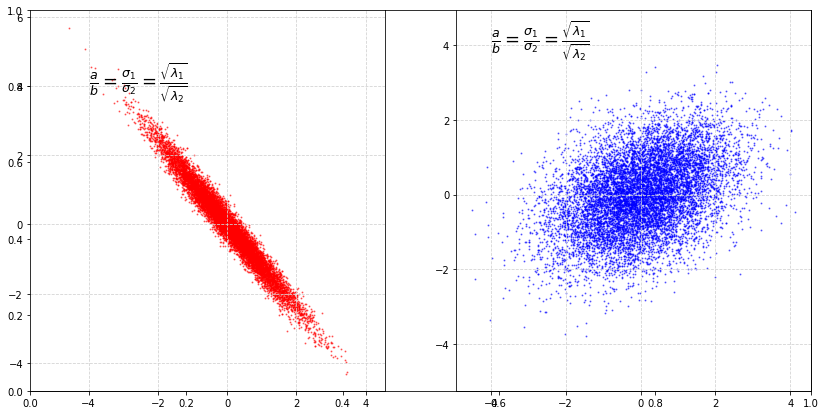

In [25]:

######################
fig, axs = plt.subplots(figsize = (14, 7))
axs = fig.add_subplot(121)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1.5
rho12 = -1.2
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], [rho12, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'r', alpha = .5)

string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')

#####################
#####################
axs = fig.add_subplot(122)

###################
mu1, mu2 = 0, 0
rho12 = .5
sigma1, sigma2 = 1.5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], [rho12, sigma2]])

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'b', alpha = .5)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')
plt.show()

It is clear that covariance decides the rotation angle.

The rotation matrix which is a linear transformation operator

$$
\left[
\begin{matrix}
\cos \theta & -\sin\theta\\
\sin \theta & \cos\theta
\end{matrix}
\right]
$$

the rotation matrix is closely connected with the covariance matrix.

Next we will plot circles with parametric functions, then transform them by the covariance matrix.

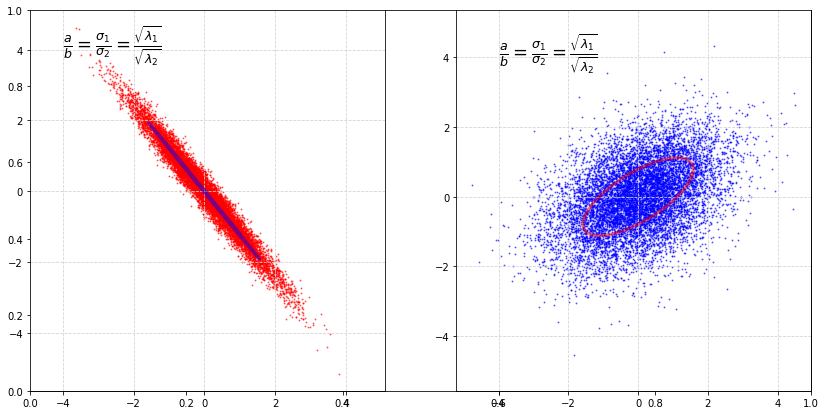

In [65]:

######################
fig, axs = plt.subplots(figsize = (14, 7))
axs = fig.add_subplot(121)

###################
mu1, mu2 = 0, 0
sigma1, sigma2 = 1, 1.5
rho12 = -1.2
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], 
                  [rho12, sigma2]])

###############
a = 1
b = 1
t = np.arange(0, 2.1*np.pi, .1)
x = a * np.cos(t)
y = b * np.sin(t)

B = np.concatenate((x, y)).reshape(2,66)
C= Sigma@B
axs.plot(C[0,:], C[1,:], color = 'b', lw = 3, alpha = .5)
###################

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'r', alpha = .5)

string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')

#####################
#####################
axs = fig.add_subplot(122)

###################
mu1, mu2 = 0, 0
rho12 = .5
sigma1, sigma2 = 1.5, 1
mu = np.array([mu1, mu2])
Sigma = np.array([[sigma1, rho12], 
                  [rho12, sigma2]])

############
a = 1
b = 1
x = a * np.cos(t)
y = b * np.sin(t)

B = np.concatenate((x, y)).reshape(2,66)
C= Sigma@B
axs.plot(C[0,:], C[1,:], color = 'r', lw = 3, alpha = .5)
###########

k = 10000
mn = sp.stats.multivariate_normal(mean=mu, cov=Sigma)
X = mn.rvs(size=k)
axs.scatter(X[:,0], X[:,1], s = 1, color = 'b', alpha = .5)

#####################
string = r'$\frac{a}{b}= \frac{\sigma_1}{\sigma_2}= \frac{\sqrt{\lambda_1}}{\sqrt{\lambda_2}}$'
axs.text(x=-4, y=4, s=string, size = 18)
axs.grid(color='lightgray',linestyle='--')
axs.axis('equal')
plt.show()

We can see that covariance matrix functions like a rotation matrix.

# <font face="gotham" color="purple"> Quadratic Form of Normal Distribution

If a random normal vector $\mathbf{x} \sim N(\mathbf{\mu}, \Sigma)$, the linear transformation $A\mathbf{x}=\mathbf{z}$ is also normally distributed, but we would like to know more of $A\mathbf{x}$. Take expectation and variance respectively,

$$
E(\mathbf{z})= AE(\mathbf{x}) = AE(\mathbf{x})= A\mathbf{\mu}
$$

\begin{align}
\text{Var}(\mathbf{z})&= E[(\mathbf{z} - E(\mathbf{z}))(\mathbf{z}-E(\mathbf{z}))^T]\\
&= E[(A\mathbf{x} - A\mathbf{\mu}))(A\mathbf{x}-A\mathbf{\mu})^T]\\
& = AE[(\mathbf{x}-\mathbf{\mu})(\mathbf{x}-\mathbf{\mu})^T]A^T\\
& = A\Sigma A^T
\end{align}

where $A$ is a deterministic matrix.

If $\Sigma = \sigma^2 \mathbf{I}$, then $\text{Var}(\pmb{z})= \sigma^2AA^T$.